In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>Deploying trained weights and config file in OpenCV:<h2>

In [3]:

net = cv2.dnn.readNetFromDarknet("/Users/anubhav/Desktop/yolov3_custom.cfg",
                                 "/Users/anubhav/Desktop/yolov3-obj_30000.weights")
classes = ['fish']

In [ ]:
x_cen=0
my_list = []


#location of mp4 file
cap = cv2.VideoCapture('/Users/anubhav/Desktop/fishhhhh.mp4')

while 1:
    _, img = cap.read()
    img = cv2.resize(img,(960,480))
    hight,width,_ = img.shape
    blob = cv2.dnn.blobFromImage(img, 1/255,(416,416),(0,0,0),swapRB = True,crop= False)

    net.setInput(blob)

    output_layers_name = net.getUnconnectedOutLayersNames()

    layerOutputs = net.forward(output_layers_name)

    boxes =[]
    confidences = []
    class_ids = []

    for output in layerOutputs:
        for detection in output:
            score = detection[5:]
            class_id = np.argmax(score)
            confidence = score[class_id]
            if confidence > 0.7:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * hight)
                w = int(detection[2] * width)
                h = int(detection[3]* hight)
                x = int(center_x - w/2)
                y = int(center_y - h/2)
                boxes.append([x,y,w,h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)
    indexes = cv2.dnn.NMSBoxes(boxes,confidences,.5,.4)

    boxes =[]
    confidences = []
    class_ids = []

    for output in layerOutputs:
        for detection in output:
            score = detection[5:]
            class_id = np.argmax(score)
            confidence = score[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * hight)
                w = int(detection[2] * width)
                h = int(detection[3]* hight)

                x = int(center_x - w/2)
                y = int(center_y - h/2)



                boxes.append([x,y,w,h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes,confidences,.8,.4)
    font = cv2.FONT_HERSHEY_PLAIN
    colors = np.random.uniform(0,255,size =(len(boxes),3))
    if  len(indexes)>0:
        for i in indexes.flatten():
            x,y,w,h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i],2))
            color = colors[i]
            cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
            
            
            my_list.append(w/2)
            
#             if(w/2>x_cen):
#                 my_list.append(w/2)
#                 x_cen = w/2


            
            cv2.putText(img,label + " " + confidence, (x,y+400),font,2,color,2)

    cv2.imshow('img',img)
    if cv2.waitKey(1) == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()



<h2>Extracted the centre-points of object detected<h2>

In [37]:
my_list

[33.5,
 34.0,
 36.5,
 37.5,
 38.5,
 40.0,
 43.0,
 49.0,
 49.5,
 38.0,
 38.5,
 50.5,
 38.5,
 38.0,
 38.5,
 38.5,
 39.5,
 39.0,
 40.0,
 39.0,
 39.5,
 38.5,
 37.0,
 48.0,
 51.5,
 58.5,
 58.5,
 61.5,
 63.5,
 63.5,
 68.0,
 62.5,
 63.0,
 62.0,
 61.5,
 63.0,
 65.5,
 64.5,
 75.5,
 84.5,
 85.0,
 84.0,
 93.5,
 91.5,
 98.5,
 101.0,
 100.5,
 96.0,
 110.0,
 95.0,
 93.0,
 92.5,
 98.5,
 106.0,
 110.0,
 110.0,
 118.5,
 120.0,
 121.0,
 127.5,
 125.5,
 126.5,
 132.0,
 130.5,
 128.5,
 124.5,
 124.5,
 122.0,
 126.0,
 121.5,
 128.5,
 119.5,
 121.5,
 117.0,
 121.5,
 115.5,
 116.5,
 119.5,
 121.5,
 118.5,
 121.0,
 120.5,
 122.0,
 129.5,
 140.0,
 137.5]

<h2>Performing Forecasting algorithm to predict path of moving object<h2>

In [62]:
df = pd.DataFrame(my_list)
df.shape

(86, 1)

In [63]:
import matplotlib.pyplot as plt 
%matplotlib inline


In [64]:
df.columns = ['centre']
df.head()

,centre
0,33.5
1,34.0
2,36.5
3,37.5
4,38.5


<AxesSubplot:>

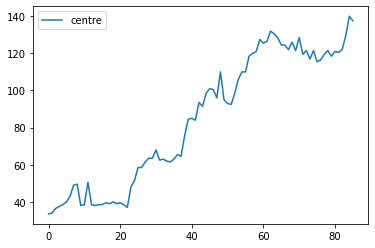

In [65]:
df.plot()

In [66]:
from statsmodels.tsa.stattools import adfuller

In [67]:
test_result = adfuller(df['centre'])

In [68]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [69]:
df['Seasonal First Difference'] = df['centre']-df['centre'].shift(12)

In [70]:
df.shape

(86, 2)

In [47]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.034714269877165
p-value : 0.27156251035534573
#Lags Used : 0
Number of Observations Used : 73
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<AxesSubplot:>

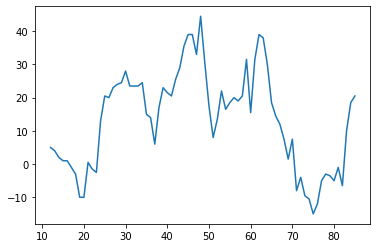

In [71]:
df['Seasonal First Difference'].plot()

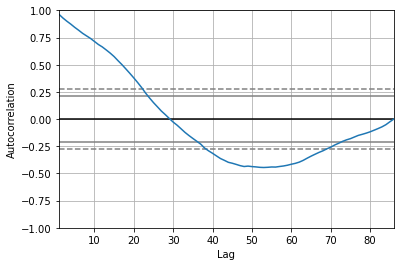

In [72]:
 from pandas.plotting import autocorrelation_plot
 autocorrelation_plot(df['centre'])
 plt.show()

In [73]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

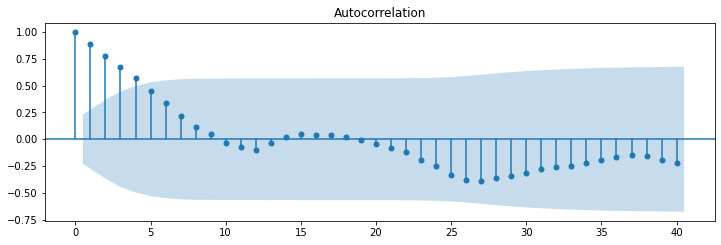

In [74]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
# ax2 = fig.add_subplot(212)
# fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

<h2>Using ARIMA to preidict its path<h2>

In [77]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['centre'], order=(1,1,1))
model_fit=model.fit()

/Users/anubhav/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/anubhav/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and st

<AxesSubplot:>

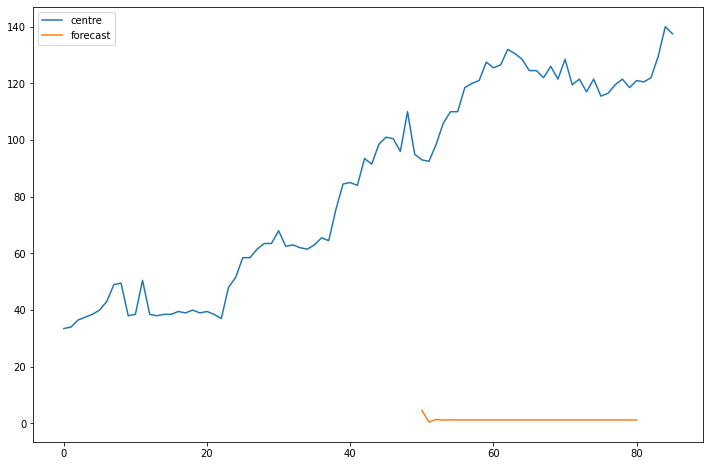

In [79]:
df['forecast']=model_fit.predict(start=50,end=80,dynamic=True)
df[['centre','forecast']].plot(figsize=(12,8))

<h2>Using SARIMAX to predict path <h2>

In [91]:
model=sm.tsa.statespace.SARIMAX(df['centre'],order=(1, 0, 0),seasonal_order=(1,1,1,12))
results=model.fit()

<AxesSubplot:>

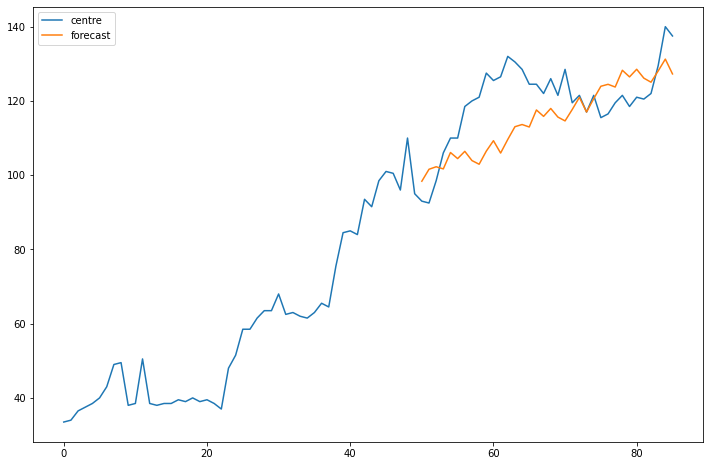

In [99]:
df['forecast']=results.predict(start=50,end=86,dynamic=True)
df[['centre','forecast']].plot(figsize=(12,8))

<h2>Using SARIMAX to predict path <h2>

In [100]:
from statsmodels.tsa.ar_model import AutoReg

In [111]:
df.head()

0    33.5
1    34.0
2    36.5
3    37.5
4    38.5
Name: centre, dtype: float64

In [112]:

df=pd.DataFrame(df)

In [113]:
df.head()

,centre
0,33.5
1,34.0
2,36.5
3,37.5
4,38.5


<AxesSubplot:>

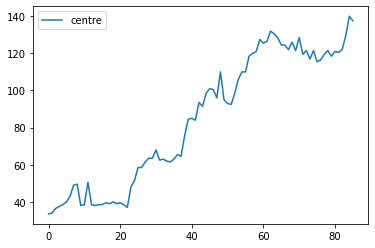

In [114]:
df.plot()

In [115]:
dftest = adfuller(df['centre'],autolag = 'AIC')
print('1: ADF:',dftest[0])
print('2: P-values:',dftest[1])
print('3: Number of Lags:',dftest[2])
print('4:critical values :')
for key,val in dftest[4].items():
    print("\t",key ,":" ,val)


1: ADF: -0.45468186988222903
2: P-values: 0.9005607874283794
3: Number of Lags: 1
4:critical values :
	 1% : -3.510711795769895
	 5% : -2.8966159448223734
	 10% : -2.5854823866213152


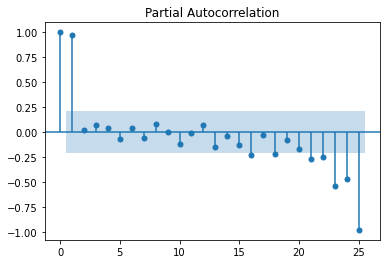

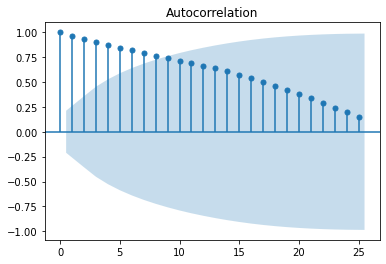

In [120]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf=plot_pacf(df['centre'],lags=25)
acf=plot_acf(df['centre'],lags=25)

In [122]:
X=df['centre']
train =X[:len(X)-7]
test =X[len(X)-7:]

In [125]:
model = AutoReg(train,lags =10).fit()

/Users/anubhav/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [126]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                 centre   No. Observations:                   79
Model:                    AutoReg(10)   Log Likelihood                -203.444
Method:               Conditional MLE   S.D. of innovations              4.616
Date:                Wed, 10 Nov 2021   AIC                              3.407
Time:                        12:42:36   BIC                              3.795
Sample:                            10   HQIC                             3.561
                                   79                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.7018      1.560      1.732      0.083      -0.356       5.760
centre.L1      0.7627      0.114      6.714      0.000       0.540       0.985
centre.L2      0.2760      0.143      1.933      0.0

In [139]:
pred =model.predict(start=0,end =79,dynamic=False)

In [136]:
train.shape

(79,)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
75    118.433659
76    119.020370
77    115.413709
78    121.251264
79    121.444056
Length: 80, dtype: float64


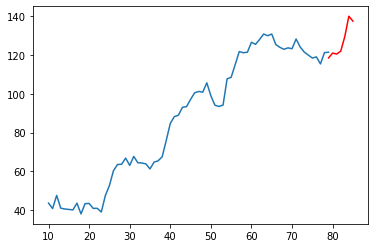

In [140]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test,color ='red')
print(pred)

